In [1]:
library('tidyverse')
library('Seurat')
library('scCustomize')
library('pheatmap')
library('colorRamp2')
library('stringr')
library('caret')
library("viridis")  
library('RColorBrewer')
library('UpSetR')
library('gridExtra')
library('cowplot')
library('ggpubr')
library('scales')
suppressMessages(library('ComplexHeatmap'))

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


scCustomize v2.1.2
If you find the scCustomize useful please cite.
See 'samuel-marsh.github.io/scCustomize/articles/FAQ.html' for citation info.

Loading required package: lattice


Attaching p

In [2]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/liblapack.so.3

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ComplexHeatmap_2.10.0 scales_1.3.0          ggpubr_0.6.0         
 [4] cowplot_1.1.1         gridExtra_2.3         UpSetR_1.4.0         
 [7] RColorBrewer_1.1-3    viridis_0.6.2         viridisLite_0.4.0    
[10] caret_6.0-94          lattice_0.20-45       colorRamp2_0.1.0     
[13] pheatmap_

### Load RDS Files

In [16]:
cwb_64 <- readRDS('/home/jupyter/CS15_WHBL/CWB_Paper/01_Final_Data/04_Data/Fig_4_fully.rds')

### Color Definitions

In [17]:
red <- '#F8766D'
blue <- '#619CFF'
green <- '#00BA38'
yl_or <- '#FAC05E'

palette <- c(red, blue)
palette2 <- c(red, blue, green, yl_or)

### 64 Sample UMAP

In [18]:
cwb_64 <- JoinLayers(cwb_64)

In [19]:
# cwb_64_merge <- Merge_Seurat_List(cwb_64)
cwb_64_merge <- cwb_64

In [20]:
cwb_64_merge

An object of class Seurat 
18082 features across 411871 samples within 1 assay 
Active assay: RNA (18082 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

In [21]:
# cwb_64_merge <- NormalizeData(cwb_64_merge) %>% 
#     FindVariableFeatures() %>% 
#     ScaleData() %>% 
#     RunPCA() %>% 
#     RunUMAP(dims = 1:20) %>% 
#     FindNeighbors(dims = 1:20) %>% 
#     FindClusters(resolution = 0.5)

In [22]:
head(cwb_64_merge)

,orig.ident,nCount_RNA,nFeature_RNA,Barcodes,Doublet_Score,Predicted_Doublet,percent.mt,well,donor,donor2,RNA_snn_res.0.5,seurat_clusters
,<chr>,<dbl>,<int>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<fct>,<fct>
AAACAAGCACCGGTAGACTTTAGG-1_1,BL05013-033_w1,6654,3198,AAACAAGCACCGGTAGACTTTAGG-1,0.04133545,False,2.1791404,w1,BL05013,BL05013-033,3,3
AAACAAGCACTCCCTTACTTTAGG-1_1,BL05013-033_w1,14577,4339,AAACAAGCACTCCCTTACTTTAGG-1,0.01758642,False,0.4047472,w1,BL05013,BL05013-033,2,2
AAACAAGCATTCCTTTACTTTAGG-1_1,BL05013-033_w1,11459,4099,AAACAAGCATTCCTTTACTTTAGG-1,0.01044530,False,0.9424906,w1,BL05013,BL05013-033,10,10
AAACAAGCATTTAGCCACTTTAGG-1_1,BL05013-033_w1,5790,2967,AAACAAGCATTTAGCCACTTTAGG-1,0.02735978,False,2.6943005,w1,BL05013,BL05013-033,5,5
AAACCAATCAGTAGCGACTTTAGG-1_1,BL05013-033_w1,4833,2662,AAACCAATCAGTAGCGACTTTAGG-1,0.05347594,False,1.6139044,w1,BL05013,BL05013-033,0,0
AAACCAATCCCTGGTGACTTTAGG-1_1,BL05013-033_w1,7424,3490,AAACCAATCCCTGGTGACTTTAGG-1,0.01680672,False,0.8890086,w1,BL05013,BL05013-033,9,9
AAACCAATCCTGACTAACTTTAGG-1_1,BL05013-033_w1,7406,3448,AAACCAATCCTGACTAACTTTAGG-1,0.07843137,False,1.5527950,w1,BL05013,BL05013-033,3,3
AAACCAATCGACCGTTACTTTAGG-1_1,BL05013-033_w1,6069,3089,AAACCAATCGACCGTTACTTTAGG-1,0.08371041,False,2.2903279,w1,BL05013,BL05013-033,1,1
AAACCAATCGGTTATTACTTTAGG-1_1,BL05013-033_w1,5214,2816,AAACCAATCGGTTATTACTTTAGG-1,0.06072106,False,1.7453011,w1,BL05013,BL05013-033,1,1


In [24]:
Idents(cwb_64_merge) <- 'well'
levels(cwb_64_merge)

[1] "w1" "w2" "w3" "w4"

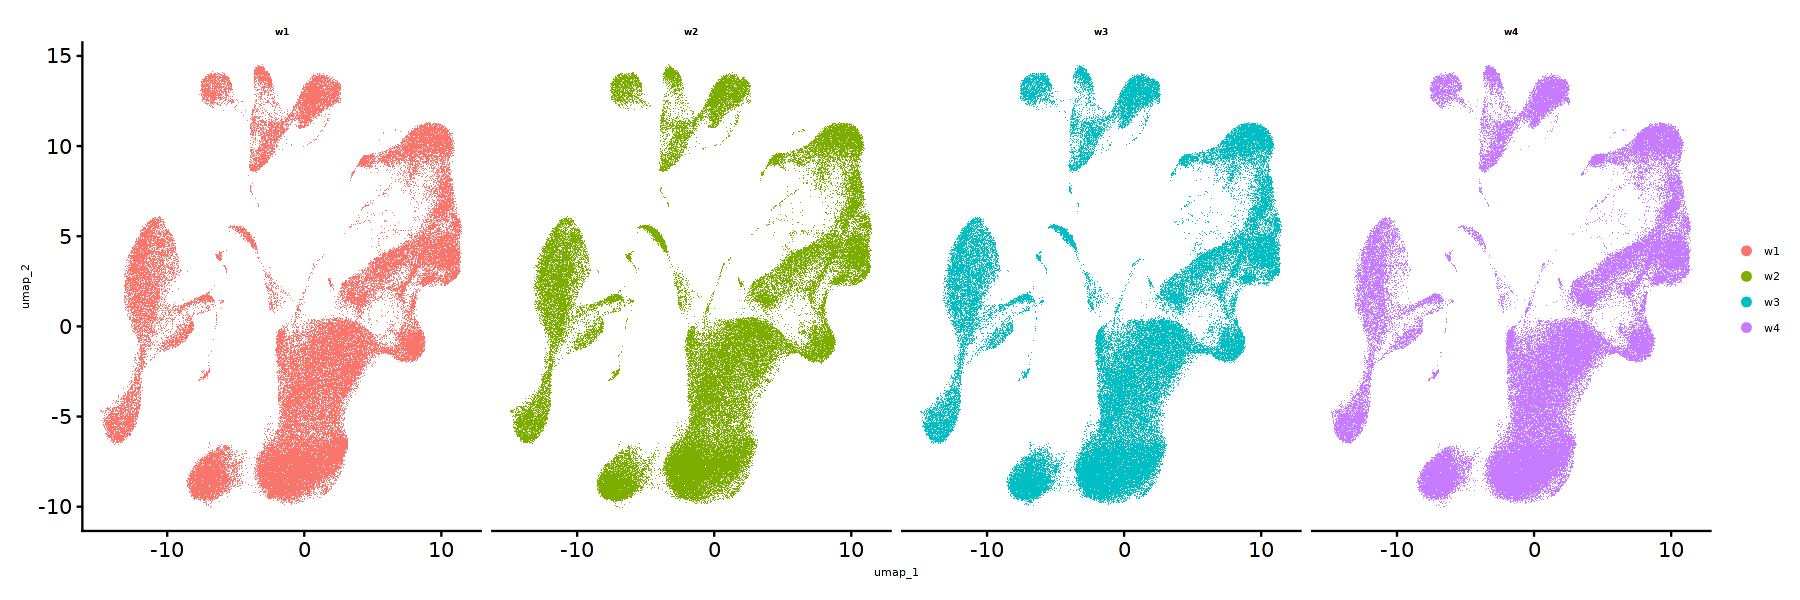

In [47]:
options(repr.plot.width=15,repr.plot.height=5)

p <- DimPlot_scCustom(seurat_object = cwb_64_merge,             
                      reduction = "umap", 
                      group.by = "well", 
                      label = FALSE,
                      split.by='well',
                      split_seurat = TRUE ,
                      colors_use = hue_pal()(4)
                     ) +
            theme(text = element_text(family="sans", size = 6),
                  legend.text=element_text(size=6),
                  plot.title = element_blank()) +
            guides(color = guide_legend(override.aes = list(size = 2)))
p

In [48]:
pdf("Fig3C_64_UMAP.pdf", width = 7, height = 2.6, onefile=TRUE)
p
invisible(dev.off())

### Cross Well Gene Violin Plots

In [35]:
Idents(cwb_64_merge) <- "donor"
cwb_64_d1 <- subset(x = cwb_64_merge, idents = "BL05013")

In [36]:
cwb_64_d1$donor2 <- gsub('BL05013-033','Pool 1 Rep 1', cwb_64_d1$donor2)
cwb_64_d1$donor2 <- gsub('BL05013-034','Pool 1 Rep 2', cwb_64_d1$donor2)
cwb_64_d1$donor2 <- gsub('BL05013-035','Pool 1 Rep 3', cwb_64_d1$donor2)
cwb_64_d1$donor2 <- gsub('BL05013-036','Pool 2 Rep 1', cwb_64_d1$donor2)
cwb_64_d1$donor2 <- gsub('BL05013-037','Pool 2 Rep 2', cwb_64_d1$donor2)
cwb_64_d1$donor2 <- gsub('BL05013-038','Pool 2 Rep 3', cwb_64_d1$donor2)
cwb_64_d1$donor2 <- gsub('BL05013-039','Pool 3 Rep 1', cwb_64_d1$donor2)
cwb_64_d1$donor2 <- gsub('BL05013-040','Pool 3 Rep 2', cwb_64_d1$donor2)
cwb_64_d1$donor2 <- gsub('BL05013-041','Pool 3 Rep 3', cwb_64_d1$donor2)
cwb_64_d1$donor2 <- gsub('BL05013-042','Pool 4 Rep 1', cwb_64_d1$donor2)
cwb_64_d1$donor2 <- gsub('BL05013-043','Pool 4 Rep 2', cwb_64_d1$donor2)
cwb_64_d1$donor2 <- gsub('BL05013-044','Pool 4 Rep 3', cwb_64_d1$donor2)

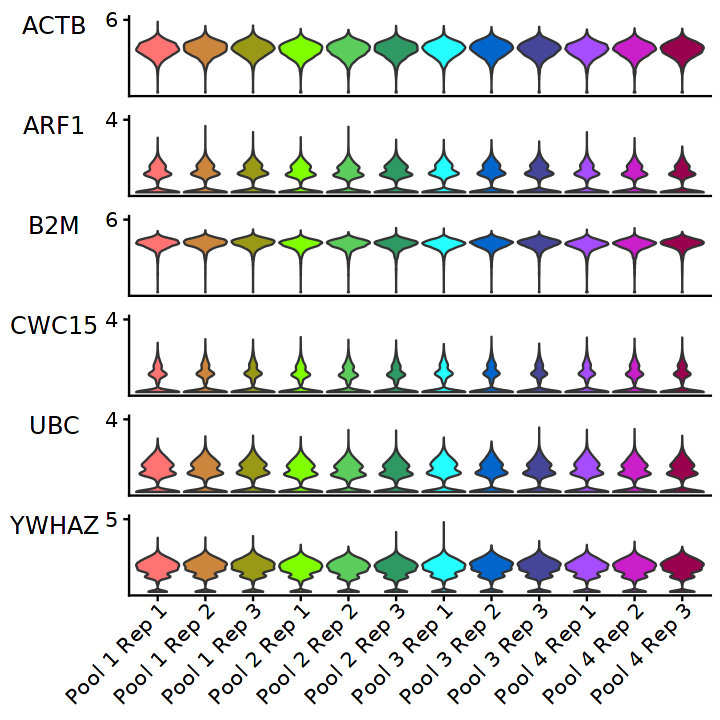

In [37]:
options(repr.plot.width=6,repr.plot.height=6)

hk_genes <- c('ACTB','ARF1','B2M','CWC15','UBC','YWHAZ')
colors <- DiscretePalette_scCustomize(num_colors = 12,palette = "varibow")

# Create Plots
p1 <- Stacked_VlnPlot(seurat_object = cwb_64_d1, 
                    features = hk_genes, 
                    x_lab_rotate = TRUE, 
                    colors_use = colors, 
                    group.by = 'donor2'
                   )

p1

In [38]:
pdf("Fig3C_Donor1_Violins.pdf", width = 6, height = 4, onefile=TRUE)
p1
invisible(dev.off())

### Correlation Heat Map

In [56]:
cwb_64_merge$donor2_well <- paste0(cwb_64_merge$donor2,'_',cwb_64_merge$well)

In [57]:
Idents(cwb_64_merge)<-'donor2_well'
cwb_64_merge_corr <- as.data.frame(AverageExpression(object=cwb_64_merge))

In [58]:
new_order <- c('RNA.BL05013.033.w1','RNA.BL05013.034.w1','RNA.BL05013.035.w1',
               'RNA.BL05013.036.w2','RNA.BL05013.037.w2','RNA.BL05013.038.w2',
               'RNA.BL05013.039.w3','RNA.BL05013.040.w3','RNA.BL05013.041.w3',
               'RNA.BL05013.042.w4','RNA.BL05013.043.w4','RNA.BL05013.044.w4',
               'RNA.BL05045.048.w1','RNA.BL05045.049.w1','RNA.BL05045.050.w1',
               'RNA.BL05045.051.w2','RNA.BL05045.052.w2','RNA.BL05045.053.w2',
               'RNA.BL05045.054.w3','RNA.BL05045.055.w3','RNA.BL05045.056.w3',
               'RNA.BL05045.057.w4','RNA.BL05045.058.w4','RNA.BL05045.059.w4',
               'RNA.BL05113.013.w1','RNA.BL05113.014.w1','RNA.BL05113.015.w1',
               'RNA.BL05113.016.w2','RNA.BL05113.017.w2','RNA.BL05113.018.w2',
               'RNA.BL05113.019.w3','RNA.BL05113.020.w3','RNA.BL05113.021.w3',
               'RNA.BL05113.022.w4','RNA.BL05113.023.w4','RNA.BL05113.024.w4',
               'RNA.BL05759.020.w1','RNA.BL05759.021.w1','RNA.BL05759.022.w1',
               'RNA.BL05759.023.w2','RNA.BL05759.024.w2','RNA.BL05759.025.w2',
               'RNA.BL05759.026.w3','RNA.BL05759.027.w3','RNA.BL05759.028.w3',
               'RNA.BL05759.029.w4','RNA.BL05759.030.w4','RNA.BL05759.031.w4',
               'RNA.BL05760.028.w1','RNA.BL05760.029.w1','RNA.BL05760.030.w1',
               'RNA.BL05760.031.w2','RNA.BL05760.032.w2','RNA.BL05760.033.w2',
               'RNA.BL05760.034.w3','RNA.BL05760.035.w3','RNA.BL05760.036.w3',
               'RNA.BL05760.037.w4','RNA.BL05760.038.w4','RNA.BL05760.039.w4',
               'RNA.PB02183.154.w1','RNA.PB02183.154.w2','RNA.PB02183.154.w3','RNA.PB02183.154.w4')

In [59]:
test <- cor(cwb_64_merge_corr, use='all.obs', method='pearson')

In [69]:
test2 <- test[, new_order]
test2 <- test2[new_order , ]

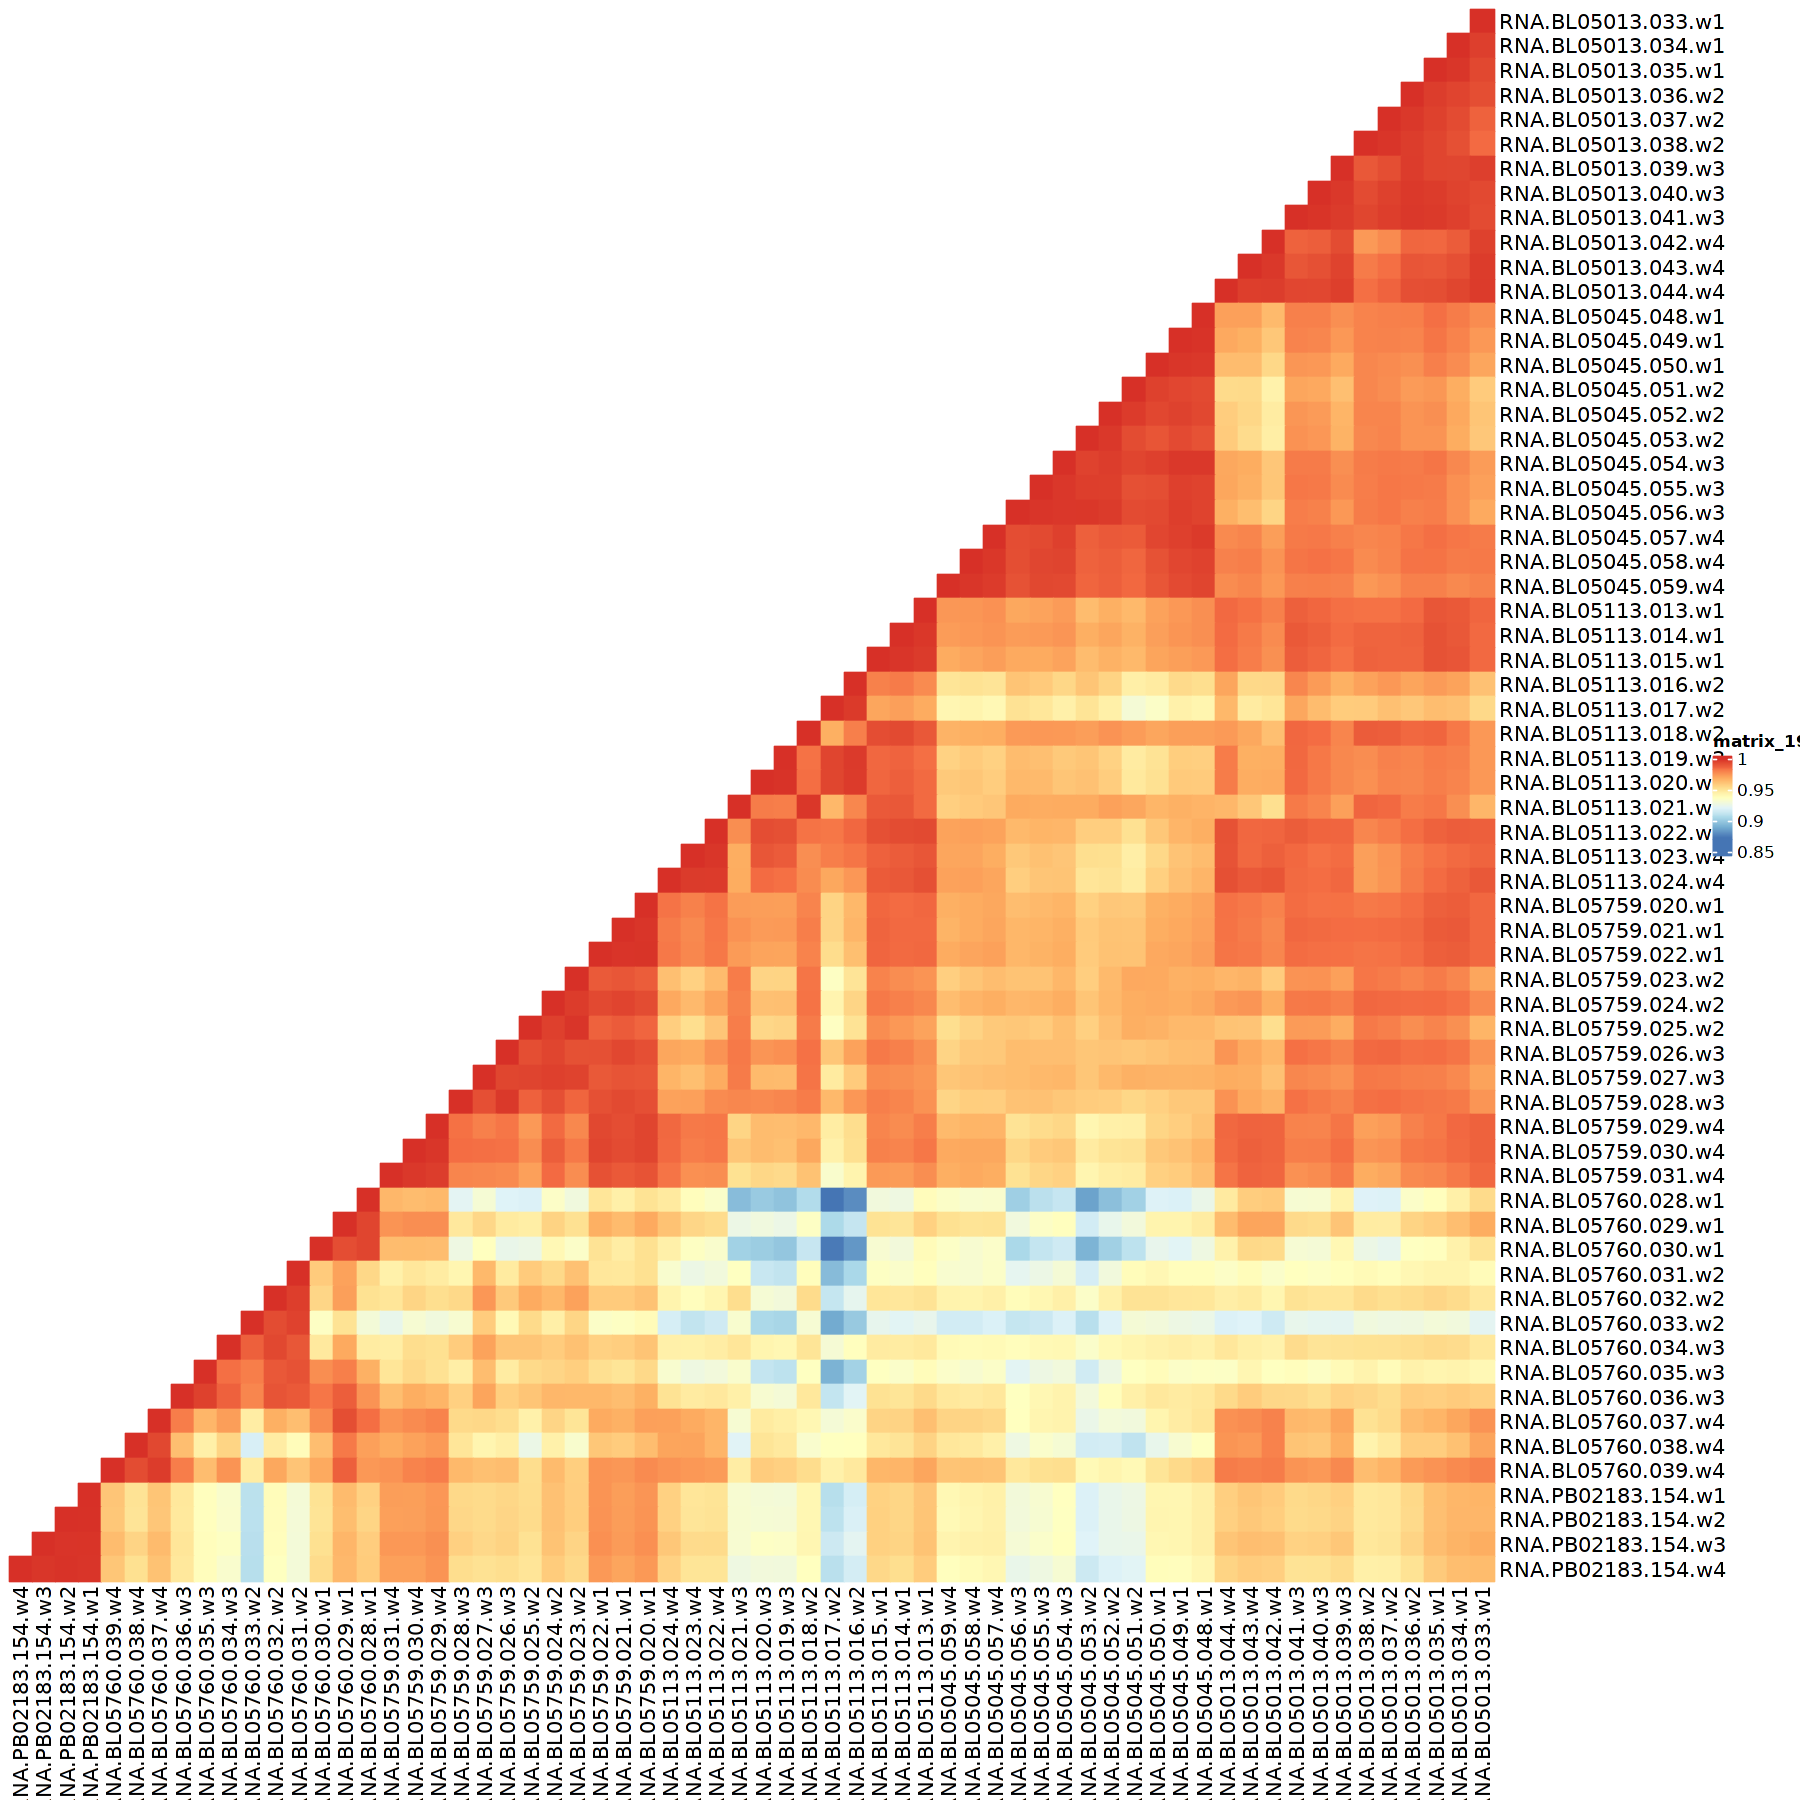

In [73]:
options(repr.plot.width=15, repr.plot.height=15)

p <- Heatmap(test2, 
        rect_gp = gpar(type = "none"),
        col = rev(brewer.pal(9, "RdYlBu")),
        cluster_rows = FALSE, 
        cluster_columns = FALSE,
        # show_row_names = FALSE,
        # show_column_names = FALSE,    
        column_order = rev(colnames(test2)),
    	cell_fun = function(j, i, x, y, w, h, fill) {
    		if(i >= j) {
			grid.rect(x, y, w, h, gp = gpar(fill = fill, col = fill))
    		}
    	})

p

In [74]:
pdf("Fig3C_corr_heatmap.pdf", width = 6, height = 5, onefile=TRUE)
p
invisible(dev.off())

In [75]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/liblapack.so.3

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ComplexHeatmap_2.10.0 scales_1.3.0          ggpubr_0.6.0         
 [4] cowplot_1.1.1         gridExtra_2.3         UpSetR_1.4.0         
 [7] RColorBrewer_1.1-3    viridis_0.6.2         viridisLite_0.4.0    
[10] caret_6.0-94          lattice_0.20-45       colorRamp2_0.1.0     
[13] pheatmap_